In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

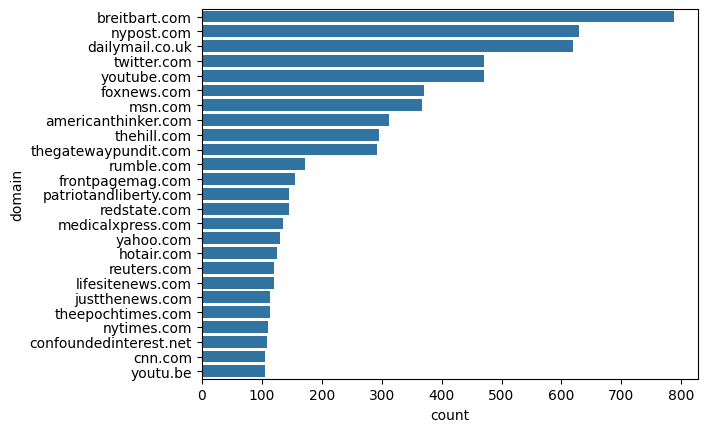

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

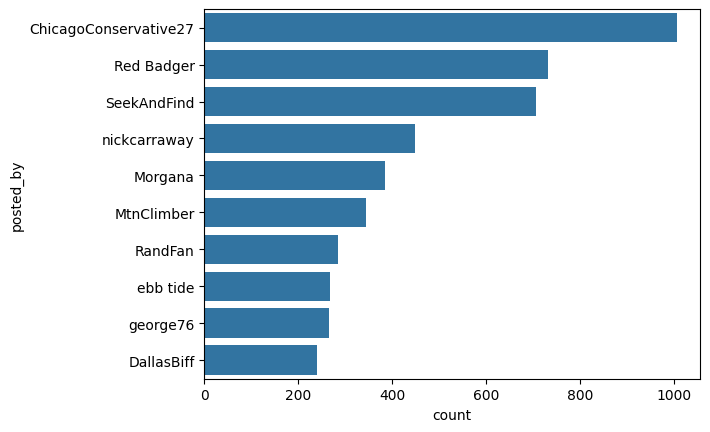

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_299500/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                             count unique   
domain                posted_by                             
americanthinker.com   MtnClimber               154      1   
                      Red Badger                 1      1   
                      SeekAndFind              114      1   
                      george76                   4      1   
breitbart.com         MtnClimber                 1      1   
                      Red Badger                 7      1   
                      george76                   2      1   
                      ChicagoConservative27    501      1   
                      Morgana                    5      1   
                      RandFan                    1      1   
                      ebb tide                   1      1   
cnn.com               Red Badger                 2      1   
                      ChicagoConservative27      2      1   
                      DallasBiff                 1      1   
                      nickcarraway               3      1   
dailymail.co.uk       Red Badger                 7      1   
                      SeekAndFind                1      1   
                      george76                   8      1   
                      Morgana                  110      1   
                      RandFan                    2      1   
                      nickcarraway               1      1   
foxnews.com           Red Badger                 4      1   
                      SeekAndFind                1      1   
                      george76                  14      1   
                      ChicagoConservative27     19      1   
                      Morgana                    2      1   
                      ebb tide                   2      1   
                      DallasBiff                 2      1   
                      nickcarraway              13      1   
frontpagemag.com      MtnClimber                24      1   
                      Red Badger                 2      1   
                      george76                   2      1   
hotair.com            SeekAndFind              106      1   
                      george76                   3      1   
                      DallasBiff                 1      1   
justthenews.com       MtnClimber                 5      1   
                      Red Badger                29      1   
                      george76                   2      1   
                      RandFan                    1      1   
                      DallasBiff                 1      1   
lifesitenews.com      SeekAndFind                1      1   
                      Morgana                    9      1   
                      ebb tide                  91      1   
medicalxpress.com     SeekAndFind                1      1   
msn.com               Red Badger                 1      1   
                      SeekAndFind               15      1   
                      ChicagoConservative27     11      1   
                      RandFan                   10      1   
                      DallasBiff                31      1   
                      nickcarraway               4      1   
nypost.com            MtnClimber                 1      1   
                      Red Badger                10      1   
                      george76                  25      1   
                      ChicagoConservative27    170      1   
                      RandFan                    1      1   
                      DallasBiff                 8      1   
                      nickcarraway             129      1   
nytimes.com           george76                   1      1   
                      ChicagoConservative27      2      1   
patriotandliberty.com Red Badger                 1      1   
redstate.com          Red Badger                 6      1   
                      SeekAndFind              103      1   
                      george76                   8      1   
                  

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_299500/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
LIVE! DeSantis vs. Newsom,2023-12-01 04:44:44,303.0
"'Sea of bodies' in Israel, scores dead in Gaza as shock Hamas attack unleashes war",2023-10-07 22:47:08,234.0
LIVE: SPEAKER ELECTION,2023-10-17 17:40:49,213.0
"Active shooter situation with multiple injuries at multiple locations in Lewiston, Maine",2023-10-26 01:52:42,174.0
Pres. Biden Delivers Address on Israel-Hamas & Russia-Ukraine Wars: LIVE THREAD,2023-10-20 01:21:56,173.0
Kentucky Election Results (11-07-23),2023-11-08 01:14:48,172.0
Update from Ukraine | The Disaster for the Ruzzian Army Continues | They try to encircle Avdiivka,2023-10-29 09:07:55,172.0
Mike Pence suspends 2024 presidential campaign,2023-10-28 21:19:16,169.0
U.S. House of Representatives Speaker Election: Round 2,2023-10-18 17:11:09,168.0
